In [7]:
import os, sys
script_dir = os.getcwd()
module_path = script_dir
for _ in range(5):
    module_path = os.path.abspath(os.path.join(module_path, '../'))
    if module_path not in sys.path:
        sys.path.insert(0,module_path)
    if os.path.basename(module_path) =='frame':
        break
from src.unit import Unit
from src.operators import *
import src.operators
from src.operator_base import op_type_dicts
from src.system import System
import pandas as pd
from src.analye_model import *
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(sys.path,module_path)

['/Users', '/Users/abhimanyu', '/Users/abhimanyu/Work/DL_codes', '/Users/abhimanyu/Work/DL_codes/frame', '/Users/abhimanyu/Work/DL_codes/frame/notebook', '/Users/abhimanyu/Work', '/Users/abhimanyu/opt/anaconda3/lib/python39.zip', '/Users/abhimanyu/opt/anaconda3/lib/python3.9', '/Users/abhimanyu/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages', '/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/aeosa', '/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg', '/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions', '/Users/abhimanyu/.ipython'] /Users/abhimanyu/Work/DL_codes/frame


In [2]:
def plot_roofline_background(system, max_x):
    op_intensity = system.flops/system.offchip_mem_bw
    flops = unit.raw_to_unit(system.flops, type='C')
    max_x = max(max_x, op_intensity*2.5)
    turning_points = [[0, 0], [op_intensity, flops], [max_x, flops]]
    turning_points = np.array(turning_points)
    plt.plot(turning_points[:,0], turning_points[:,1], c='grey')

    op_intensity = system.flops/system.onchip_mem_bw
    flops = unit.raw_to_unit(system.flops, type='C')
    turning_points = [[0, 0], [op_intensity, flops], [max_x, flops]]
    turning_points = np.array(turning_points)
    plt.plot(turning_points[:,0], turning_points[:,1], '--', c='grey')

    plt.xlabel('Op Intensity (FLOPs/Byte)')
    plt.ylabel(f'{unit.unit_compute.upper()}')

In [3]:
def dot_roofline(df):
    max_x = max(df['Op Intensity'])
    plot_roofline_background(system, max_x)
    for i in range(len(df)):
        op_intensity = df.loc[i, 'Op Intensity']
        thrpt = df.loc[i, 'Throughput (Tflops)']
        plt.scatter(op_intensity, thrpt)

/Users/abhimanyu/Work/DL_codes/frame/data/model


/Users/abhimanyu/Work/DL_codes/frame/src/analye_model.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = pd.DataFrame(np.array(roofline_list), columns=column)


,Op Type,Dimension,Bound,C/M ratio,Op Intensity,Latency (msec),Cycles,C Effcy,Input_a (MB),Input_w (MB),Output (MB),Total Data (MB),Throughput (Tflops),Roofline Throughput offchip (Tflops),Roofline Throughput onchip (Tflops)
0,GEMM,"[1, 1024, 512, 1024]",C,1.87,256.00,0.01,8192.00,1.00,0.52,1.05,0.52,2.10,123.21,123.21,123.21
1,GEMM,"[1, 1024, 512, 1024]",C,1.87,256.00,0.01,8192.00,1.00,0.52,1.05,0.52,2.10,123.21,123.21,123.21
2,GEMM,"[1, 1024, 512, 1024]",C,1.87,256.00,0.01,8192.00,1.00,0.52,1.05,0.52,2.10,123.21,123.21,123.21
3,Logit,"[1, 8, 512, 512, 128]",M,0.62,85.33,0.01,6571.08,1.00,0.52,0.52,2.10,3.15,76.80,76.80,123.21
4,Attend,"[1, 8, 512, 512, 128]",M,0.62,85.33,0.01,6571.08,1.00,2.10,0.52,0.52,3.15,76.80,76.80,123.21
5,GEMM,"[1, 1024, 512, 1024]",C,1.87,256.00,0.01,8192.00,1.00,0.52,1.05,0.52,2.10,123.21,123.21,123.21
6,GEMM,"[1, 30207, 512, 1024]",C,2.47,337.52,0.26,241656.00,1.00,0.52,30.93,15.47,46.92,123.21,123.21,123.21
7,GEMM,"[1, 1024, 512, 30207]",C,2.47,337.52,0.26,241656.00,1.00,15.47,30.93,0.52,46.92,123.21,123.21,123.21


,Latency (msec),Cycles,Parameters (MB),On-chip Memory Footprint (MB)
0,0.56,529222.15,66.06,46.92


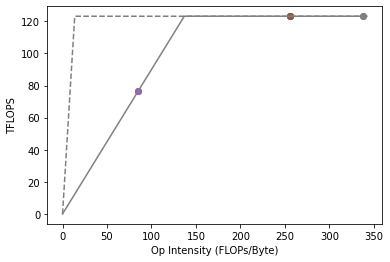

In [5]:

# model = 'vgg16'
# data_path = os.path.join(module_path,"data")

# seq_len = 256
model = 'custom_attn_vanilla'
data_path = os.path.join(module_path,"data")
model_path = os.path.join(data_path,"model")
# create_model(seq_len, name=model, data_path=data_path)
print(model_path)

batch_size = 1
unit = Unit()
system = System(unit)
model_df = get_model_df(model, system, unit, batch_size, data_path, sparse=False )
display(model_df)

dot_roofline(model_df)
get_summary_table(model_df)